In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import ast
from scipy.stats import pearsonr



# Carga e Inspección Inicial de Datos
En esta primera etapa, cargamos el dataset `10k_Poplar_Tv_Shows.csv`. Realizamos una inspección inicial para entender la estructura de los datos con los que vamos a trabajar.

* **`df.info()`**: Nos permite ver los tipos de datos, la cantidad de registros y los valores nulos.

* **`df.head()`**: Muestra las primeras 5 filas para una vista previa de los datos. 

* **`df.duplicated().sum()`**: Se utiliza para una primera comprobación de filas completamente duplicadas.
 
**Hallazgos Iniciales:**  **Se detectaron 284 filas duplicadas**. Columnas clave como `origin_country` están almacenadas como *strings* y no como listas. La columna `first_air_date` está como un *objeto* (string) y necesita ser convertida a fecha.

In [2]:
df_shows = pd.read_csv('/kaggle/input/10000-popular-tv-shows-dataset-tmdb/10k_Poplar_Tv_Shows.csv')
shows_copia = df_shows.copy()

In [3]:
shows_copia.head()

,adult,backdrop_path,genre_ids,id,origin_country,original_language,original_name,overview,popularity,poster_path,first_air_date,name,vote_average,vote_count
0,False,/iHSwvRVsRyxpX7FE7GbviaDvgGZ.jpg,"[10765, 9648, 35]",119051,['US'],en,Wednesday,"Smart, sarcastic and a little dead inside, Wed...",318.7812,/36xXlhEpQqVVPuiZhfoQuaY4OlA.jpg,2022-11-23,Wednesday,8.392,9781
1,False,/jCcSS9iDpKgll8Kpp7qVhSn0l1f.jpg,[18],194766,['US'],en,The Summer I Turned Pretty,"Every summer, Belly and her family head to the...",266.2929,/xBIz53wYWsKfFpN0TaizVAjKJ0z.jpg,2022-06-16,The Summer I Turned Pretty,8.173,956
2,False,/biIBy2LPOOtGCgUYOls3dUEWU3v.jpg,"[10765, 18]",157239,['US'],en,Alien: Earth,When the mysterious deep space research vessel...,229.4961,/yueXS3q8BtoWekcHOATFHicLl3e.jpg,2025-08-12,Alien: Earth,7.708,427
3,False,/aSGSxGMTP893DPMCvMl9AdnEICE.jpg,"[80, 18, 9648]",1405,['US'],en,Dexter,"Dexter Morgan, a blood spatter pattern analyst...",194.8342,/q8dWfc4JwQuv3HayIZeO84jAXED.jpg,2006-10-01,Dexter,8.215,4900
4,False,/oRdc2nn7jLOYy4fBdvmFKPsKzZE.jpg,"[80, 18, 9648]",2734,['US'],en,Law & Order: Special Victims Unit,"In the criminal justice system, sexually-based...",174.1633,/34O6znqnLHAa19mZrQB0sxTDGzH.jpg,1999-09-20,Law & Order: Special Victims Unit,7.936,4010


In [4]:
shows_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              10000 non-null  bool   
 1   backdrop_path      9317 non-null   object 
 2   genre_ids          10000 non-null  object 
 3   id                 10000 non-null  int64  
 4   origin_country     10000 non-null  object 
 5   original_language  10000 non-null  object 
 6   original_name      10000 non-null  object 
 7   overview           9073 non-null   object 
 8   popularity         10000 non-null  float64
 9   poster_path        9753 non-null   object 
 10  first_air_date     9966 non-null   object 
 11  name               10000 non-null  object 
 12  vote_average       10000 non-null  float64
 13  vote_count         10000 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [5]:
shows_copia.describe()

,id,popularity,vote_average,vote_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,91242.324300,7.826304,6.550364,230.098700
std,81985.120054,10.551464,2.315176,872.623476
min,6.000000,1.421000,0.000000,0.000000
25%,21716.250000,3.674650,6.200000,4.000000
50%,70631.500000,4.910000,7.200000,23.000000
75%,123362.500000,7.980575,7.900000,128.000000
max,300369.000000,318.781200,10.000000,25527.000000


In [6]:
shows_copia.nunique()

adult                   1
backdrop_path        9051
genre_ids            1116
id                   9716
origin_country        231
original_language      60
original_name        9493
overview             8811
popularity           9118
poster_path          9476
first_air_date       6240
name                 9422
vote_average          963
vote_count           1214
dtype: int64

# Limpieza y Procesamiento de Datos

### Transformación de Fechas
Se convirtió la columna `first_air_date` a formato `datetime` usando `pd.to_datetime()`. Luego, se extrajo el año en una nueva columna llamada `year`.

El formato original (string) impide cualquier análisis temporal. Al convertirlo a `datetime`, podemos tratarlo como una fecha y extraer componentes como el año, lo cual es fundamental para analizar tendencias.

### Procesamiento de Columnas Complejas 
La columna `origin_country` era un string que parecía una lista (ej: "['US']"). Se utilizó la librería `ast` y su función `literal_eval` para convertir este string en una lista real de Python. Luego, se extrajo el primer elemento de esa lista.

Como string, no podíamos agrupar ni filtrar por país. `ast.literal_eval` es la forma segura de evaluar un string que contiene una estructura de Python. Se extrajo solo el primer país para simplificar el análisis geográfico.


### Manejo de Duplicados
Se utilizó `df.drop_duplicates(subset='id', keep='first')`.

La columna `id` es el identificador único para cada show. Al eliminar duplicados basándonos en el `id`, nos aseguramos de que cada show exista solo una vez en nuestro dataset, evitando así contar doble su popularidad o calificación.





### Manejo de Nulos
Se rellenaron los valores nulos (`NaN`) en `origin_country` y `original_language` con el string "Desconocido".

Eliminar estas filas nos haría perder datos valiosos de otras columnas (como popularidad o votos). Reemplazarlos por "Desconocido" nos permite mantener los registros y, al mismo tiempo, agrupar estos valores si fuera necesario.

## Transformacion de Fechas

In [7]:

#conversion a datatime
shows_copia['first_air_date'] = pd.to_datetime(shows_copia['first_air_date'], errors='coerce')

print(shows_copia['first_air_date'].head())
print(shows_copia['first_air_date'].dtype)

0   2022-11-23
1   2022-06-16
2   2025-08-12
3   2006-10-01
4   1999-09-20
Name: first_air_date, dtype: datetime64[ns]
datetime64[ns]


In [8]:
#creacion columna año
shows_copia['year'] = shows_copia['first_air_date'].dt.year.astype('Int64')

print(shows_copia[['first_air_date', 'year']].head())


  first_air_date  year
0     2022-11-23  2022
1     2022-06-16  2022
2     2025-08-12  2025
3     2006-10-01  2006
4     1999-09-20  1999


## Columnas Complejas

In [9]:
# Convertir strings tipo "['US']" en listas reales ['US']
shows_copia['origin_country'] = shows_copia['origin_country'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else []
)

shows_copia['country_code'] = shows_copia['origin_country'].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 else "Desconocido"
)


## Duplicados

In [10]:
dupl = shows_copia['id'].duplicated().sum()

print("cantidad de duplicados: ", dupl)

cantidad de duplicados:  284


In [11]:

#Verificamos los duplicados
ids_duplicados = shows_copia[shows_copia['id'].duplicated(keep=False)]
ids_duplicados.sort_values('id').head(10)


,adult,backdrop_path,genre_ids,id,origin_country,original_language,original_name,overview,popularity,poster_path,first_air_date,name,vote_average,vote_count,year,country_code
3579,False,/x8fMHWgeamkxxobagD7GOwcG3YH.jpg,"[18, 10766, 35]",29,[US],en,"Mary Hartman, Mary Hartman","In the fictional town of Fernwood, Ohio, subur...",6.4626,/O1bcYEBW8v7JOMNVpYOBTL6PjL.jpg,1976-01-05,"Mary Hartman, Mary Hartman",7.1,17,1976,US
3582,False,/x8fMHWgeamkxxobagD7GOwcG3YH.jpg,"[18, 10766, 35]",29,[US],en,"Mary Hartman, Mary Hartman","In the fictional town of Fernwood, Ohio, subur...",6.4626,/O1bcYEBW8v7JOMNVpYOBTL6PjL.jpg,1976-01-05,"Mary Hartman, Mary Hartman",7.1,17,1976,US
9880,False,/9SXo8SbSRnXtHGgfwagtY7Lcwas.jpg,[18],277,[PH],tl,Pangako Sa ’Yo,The story revolves around lovers Yna Macaspac ...,3.2626,/z4hlkSKIEOf0i9i2iXhoBfUpaUZ.jpg,2000-11-13,Pangako Sa ’Yo,0.0,0,2000,PH
9879,False,/9SXo8SbSRnXtHGgfwagtY7Lcwas.jpg,[18],277,[PH],tl,Pangako Sa ’Yo,The story revolves around lovers Yna Macaspac ...,3.2626,/z4hlkSKIEOf0i9i2iXhoBfUpaUZ.jpg,2000-11-13,Pangako Sa ’Yo,0.0,0,2000,PH
4218,False,NaN,"[10759, 35]",476,[US],en,She Spies,She Spies is an action-adventure television sh...,5.7738,/m5jLMLqMhFOq4zLr9bvEgPOaSzB.jpg,2002-07-20,She Spies,7.4,25,2002,US
4220,False,NaN,"[10759, 35]",476,[US],en,She Spies,She Spies is an action-adventure television sh...,5.7738,/m5jLMLqMhFOq4zLr9bvEgPOaSzB.jpg,2002-07-20,She Spies,7.4,25,2002,US
7679,False,/pVja1YCG4C75Q5dpdkNbXq2wrWb.jpg,"[10759, 18, 10765]",661,[US],en,The Young Indiana Jones Chronicles,"At the dawn of the 20th century, Indiana Jones...",3.9519,/sRiJvXKwOBss2NxFzAtGDxncdCZ.jpg,1992-03-04,The Young Indiana Jones Chronicles,6.5,127,1992,US
7682,False,/pVja1YCG4C75Q5dpdkNbXq2wrWb.jpg,"[10759, 18, 10765]",661,[US],en,The Young Indiana Jones Chronicles,"At the dawn of the 20th century, Indiana Jones...",3.9519,/sRiJvXKwOBss2NxFzAtGDxncdCZ.jpg,1992-03-04,The Young Indiana Jones Chronicles,6.5,127,1992,US
3439,False,/nI3tKuIqtSA0efUA8pe2BZz3Efm.jpg,[10763],841,[GB],en,Newsnight,A daily BBC Television current affairs program...,6.2726,/t5WG6kBLS58hQmmCBxCC7FxGHOI.jpg,1980-01-30,Newsnight,6.0,11,1980,GB
3444,False,/nI3tKuIqtSA0efUA8pe2BZz3Efm.jpg,[10763],841,[GB],en,Newsnight,A daily BBC Television current affairs program...,6.2726,/t5WG6kBLS58hQmmCBxCC7FxGHOI.jpg,1980-01-30,Newsnight,6.0,11,1980,GB


In [12]:
#limpiamos los duplicados
shows_copia = shows_copia.drop_duplicates(subset=['id'], keep='first')

shows_copia['id'].duplicated().sum()


0

## NULOS

overview             9.29
backdrop_path        6.84
poster_path          2.47
first_air_date       0.34
year                 0.34
adult                0.00
genre_ids            0.00
id                   0.00
origin_country       0.00
original_language    0.00
original_name        0.00
popularity           0.00
name                 0.00
vote_average         0.00
vote_count           0.00
country_code         0.00
dtype: float64


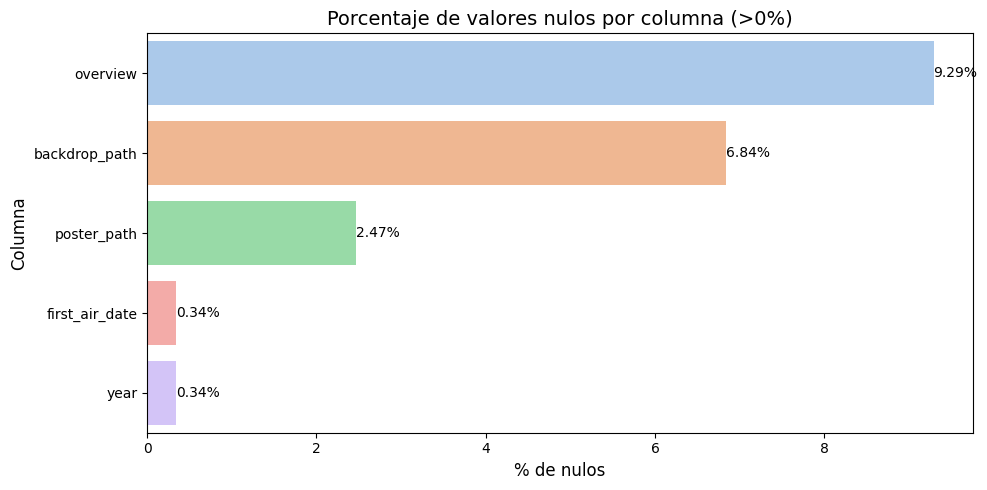

In [13]:
porcentaje_nulos = (
    shows_copia.isna()
    .mean()
    .sort_values(ascending=False) * 100
).round(2)


print(porcentaje_nulos)

porcentaje_nulos = porcentaje_nulos[porcentaje_nulos > 0]


fig, ax = plt.subplots(figsize=(10,5))


sns.barplot(
    x=porcentaje_nulos.values,
    y=porcentaje_nulos.index,
    palette="pastel",
    ax=ax
)


# Mostrar valores encima de las barras
for i, v in enumerate(porcentaje_nulos.values):
    ax.text(v, i, f"{v:.2f}%", va='center')

# Personalización
ax.set_title("Porcentaje de valores nulos por columna (>0%)", fontsize=14)
ax.set_xlabel("% de nulos", fontsize=12)
ax.set_ylabel("Columna", fontsize=12)


fig.tight_layout()

plt.show()

In [14]:
#Reemplazo de valores nulos
shows_copia['overview'] = shows_copia['overview'].fillna("Sin descripción")
shows_copia['country_code'] = shows_copia['country_code'].fillna("Desconocido")

# ¿De Dónde Vienen los Shows y Cuándo se Crearon?

Una vez limpios los datos, comenzamos a responder nuestras primeras preguntas. El objetivo de esta sección es entender el contexto de *dónde* y *cuándo* se producen los shows populares.

 **Top 10 Países y Lenguajes (Gráficos de Barras):** Se agruparon los datos por país e idioma para contar la frecuencia de cada uno.
 
 **Shows a lo largo del Tiempo (Gráfico de Líneas):** Se utilizó la columna `year` para contar cuántos shows se lanzaron cada año y visualizar tendencias en la producción de contenido


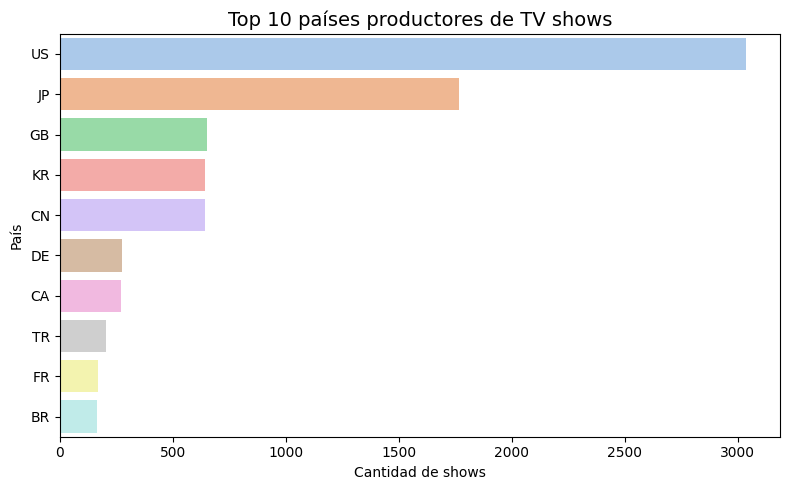

In [15]:

# Top 10 países productores
top_countries = (
    shows_copia['country_code']
    .value_counts()
    .head(10)
)

fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    palette="pastel",
    ax=ax
)
ax.set_title("Top 10 países productores de TV shows", fontsize=14)
ax.set_xlabel("Cantidad de shows")
ax.set_ylabel("País")

fig.tight_layout()

plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


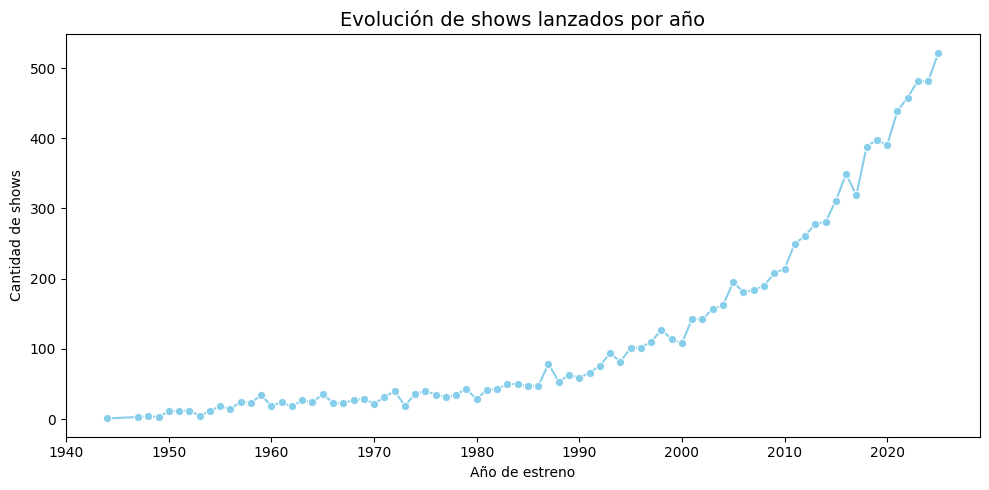

In [16]:
# Conteo por año
shows_per_year = (
    shows_copia['year']
    .value_counts()
    .sort_index()
)

fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(
    x=shows_per_year.index,
    y=shows_per_year.values,
    marker="o",
    color='skyblue',
    ax=ax
)

ax.set_title("Evolución de shows lanzados por año", fontsize=14)
ax.set_xlabel("Año de estreno")
ax.set_ylabel("Cantidad de shows")

fig.tight_layout()

plt.show()


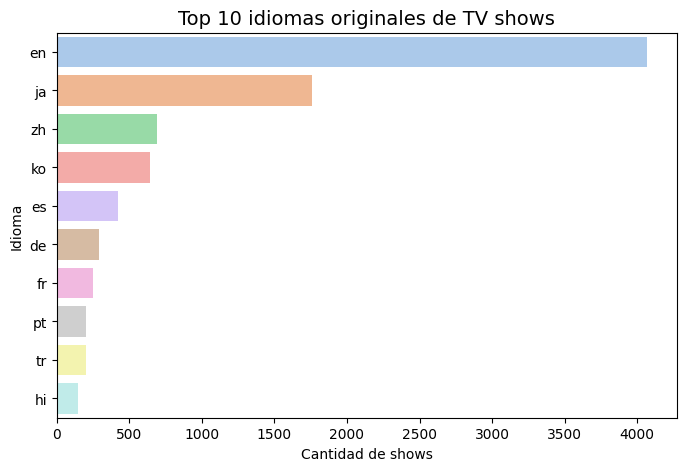

In [17]:
# Top 10 idiomas
top_langs = (
    shows_copia['original_language']
    .value_counts()
    .head(10)
)

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(
    x=top_langs.values,
    y=top_langs.index,
    palette="pastel",
    ax=ax
)

ax.set_title("Top 10 idiomas originales de TV shows", fontsize=14)
ax.set_xlabel("Cantidad de shows")
ax.set_ylabel("Idioma")

plt.show()


### Conclusión

**EE. UU. domina la producción global, seguido de Japón y Reino Unido. El crecimiento exponencial desde 2010 coincide con el auge del streaming. Y el inglés sigue siendo el idioma principal del entretenimiento mundial.**

## Identificando a los Gigantes - Ranking de Shows



En esta sección, profundizamos en las métricas que definen el "éxito" de un show: `popularity`, `vote_average` (calificación) y `vote_count` (cantidad de votos).

### Distribución de Métricas
Se utilizaron histogramas (`sns.histplot`) para visualizar la distribución de la popularidad y la calificación promedio.

Esto nos permite ver la forma de los datos. El histograma de `popularity` mostró una fuerte asimetría positiva, indicando que la mayoría de los shows tienen poca popularidad y unos pocos "mega-éxitos" dominan.

### Ranking de Shows (Popularidad vs. Calificación)
Se crearon dos rankings "Top 10": uno por popularidad y otro por calificación promedio.

Para el ranking de **calificación promedio**, se aplicó un filtro fundamental: `df[df['vote_count'] >= 100]`.

Un show puede tener una calificación de 10/10 pero con un solo voto. Esto no es estadísticamente relevante. Al filtrar y considerar solo shows con al menos 100 votos, nos aseguramos de que el ranking de "mejores calificados" sea justo y represente la opinión de una muestra significativa.

### Relación entre Popularidad y Calidad
Se utilizó un gráfico de dispersión (`scatterplot`) para comparar `popularity` vs. `vote_average`. Además, se calculó el **coeficiente de correlación de Pearson**.

El objetivo era probar la hipótesis: "¿Los shows más populares son también los de mejor calidad?". El gráfico y el bajo coeficiente de correlación (0.12) nos permitieron refutar esta idea.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


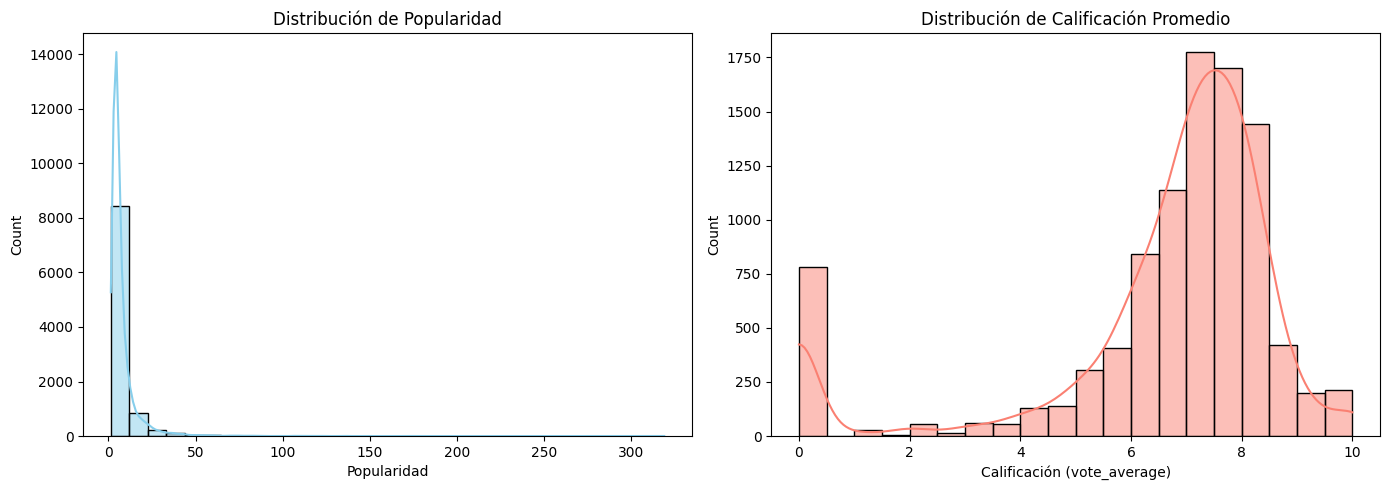

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

# Popularidad
sns.histplot(shows_copia['popularity'], kde=True, bins=30, ax=ax[0], color="skyblue")
ax[0].set_title("Distribución de Popularidad")
ax[0].set_xlabel("Popularidad")

# Calificación promedio
sns.histplot(shows_copia['vote_average'], kde=True, bins=20, ax=ax[1], color="salmon")
ax[1].set_title("Distribución de Calificación Promedio")
ax[1].set_xlabel("Calificación (vote_average)")

plt.tight_layout()
plt.show()

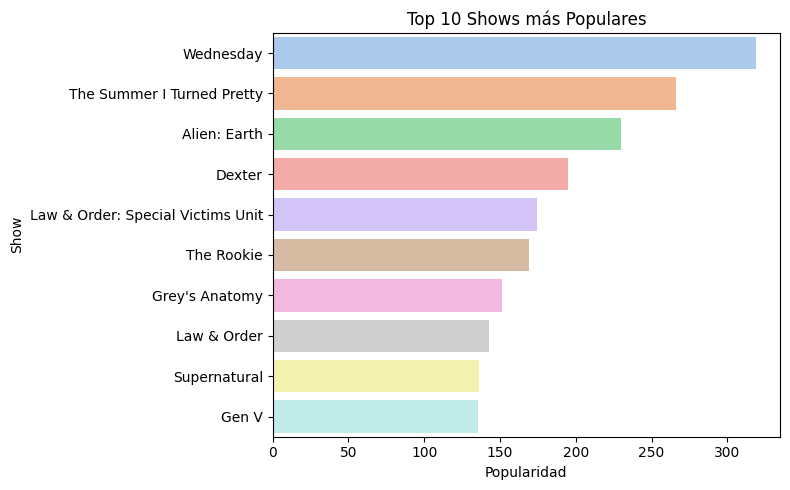

In [19]:
top_popular = shows_copia[['name','popularity']].sort_values(
    by='popularity', ascending=False
).head(10)

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(
    x='popularity', y='name',
    data=top_popular, palette="pastel", ax=ax
)
ax.set_title("Top 10 Shows más Populares")
ax.set_xlabel("Popularidad")
ax.set_ylabel("Show")


plt.tight_layout()
plt.show()


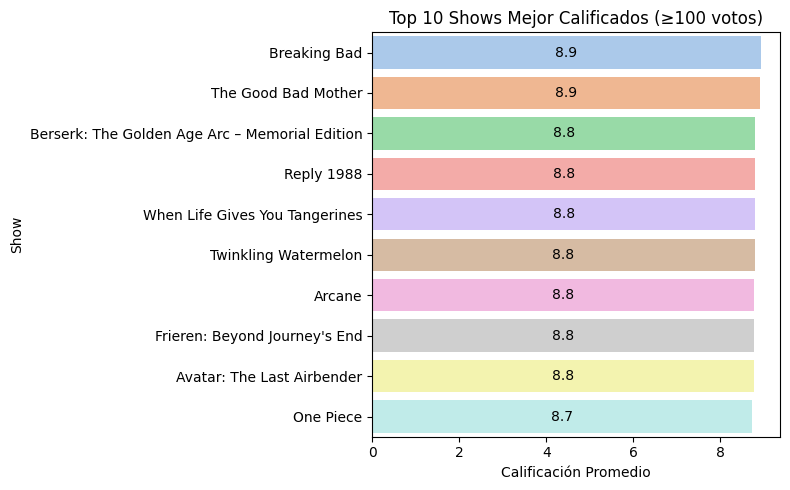

In [20]:
# Filtrar shows con al menos 100 votos
filtered = shows_copia[shows_copia['vote_count'] >= 100]

top_rated = filtered[['name','vote_average','vote_count']].sort_values(
    by='vote_average', ascending=False
).head(10)

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(
    x='vote_average', y='name',
    data=top_rated, palette="pastel", ax=ax
)

#valores dentro de las varras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='center')

ax.set_title("Top 10 Shows Mejor Calificados (≥100 votos)")
ax.set_xlabel("Calificación Promedio")
ax.set_ylabel("Show")

plt.tight_layout()
plt.show()


Coeficiente de correlación de Pearson: 0.12 (p=0.000)


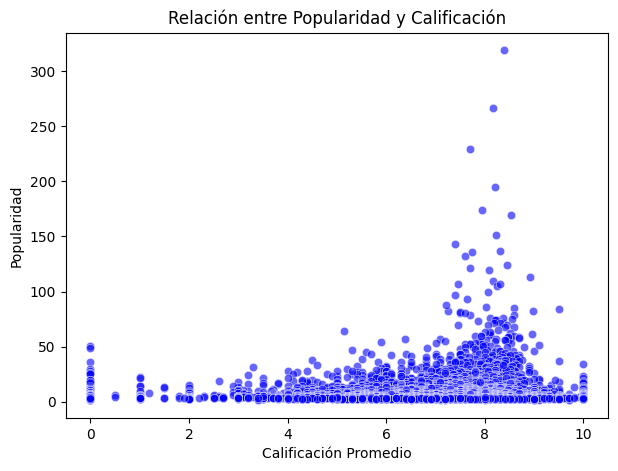

In [21]:

fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(
    x='vote_average', y='popularity',
    data=shows_copia, alpha=0.6,  color="blue", ax=ax
)
ax.set_title("Relación entre Popularidad y Calificación")
ax.set_xlabel("Calificación Promedio")
ax.set_ylabel("Popularidad")

# Calcular correlación
corr, pval = pearsonr(shows_copia['vote_average'].fillna(0),
                      shows_copia['popularity'].fillna(0))
print(f"Coeficiente de correlación de Pearson: {corr:.2f} (p={pval:.3f})")
plt.show()


Conclusion:

**El éxito no depende solo de la calidad percibida. La popularidad está fuertemente sesgada hacia unos pocos "mega-éxitos". Un análisis más profundo revela que los shows con mayor popularidad no son necesariamente los de mayor calificación, y viceversa.**

# Análisis Estadístico Descriptivo

En esta sección final, se complementan los hallazgos visuales con estadísticas descriptivas numéricas.


Se usaron **Boxplots** para visualizar la distribución, los cuartiles y los valores atípicos (outliers) de las métricas clave, confirmando la asimetría encontrada en los histogramas.

**Matriz de Correlación (Heatmap):** Se generó un mapa de calor con las correlaciones entre todas las variables numéricas.

El heatmap es una forma rápida y visual de confirmar todas las relaciones. Nos permitió ver la fuerte correlación positiva (0.79) entre `popularity` y `vote_count` y la baja correlación (0.12) entre `popularity` y `vote_average`.

In [22]:

numericas_columnas = ['popularity', 'vote_average', 'vote_count']


stats_summary = shows_copia[numericas_columnas].describe()

stats_summary

,popularity,vote_average,vote_count
count,9716.000000,9716.000000,9716.000000
mean,7.876895,6.557351,231.675793
std,10.657874,2.308623,874.319793
min,1.421000,0.000000,0.000000
25%,3.686875,6.200000,4.000000
50%,4.918300,7.200000,23.000000
75%,8.027675,7.900000,129.000000
max,318.781200,10.000000,25527.000000


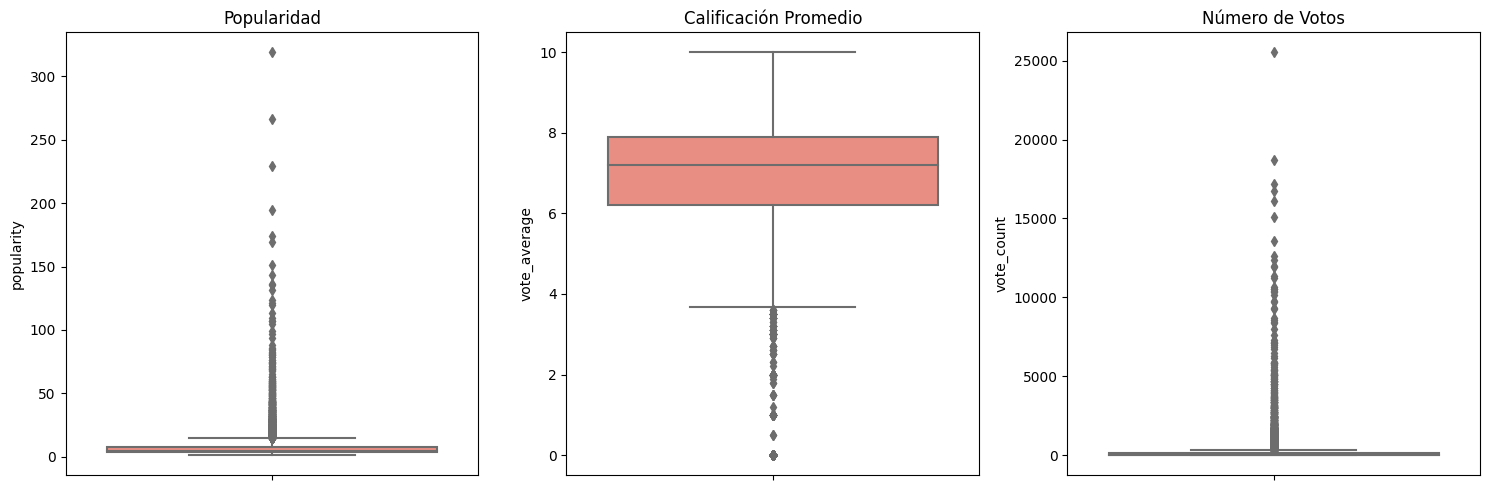

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.boxplot(y=shows_copia['popularity'], ax=ax[0], color="salmon")
ax[0].set_title("Popularidad")

sns.boxplot(y=shows_copia['vote_average'], ax=ax[1], color="salmon")
ax[1].set_title("Calificación Promedio")

sns.boxplot(y=shows_copia['vote_count'], ax=ax[2], color="salmon")
ax[2].set_title("Número de Votos")

plt.tight_layout()

plt.show()


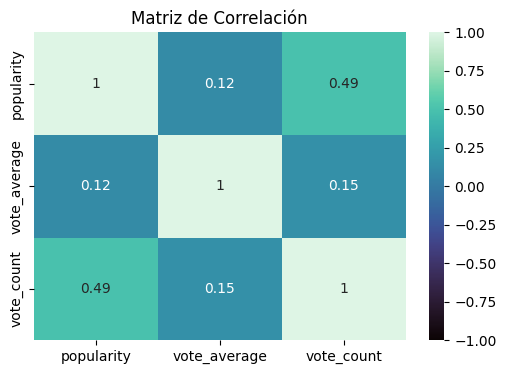

In [24]:
corr = shows_copia[['popularity','vote_average','vote_count']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="mako", vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()


Conclusion:

**La popularidad y el número de votos suelen estar fuertemente correlacionados, lo que refleja que los shows más populares tienden a recibir más participación del público. Sin embargo, la calificación promedio muestra una correlación baja con la popularidad, lo que evidencia que ser ampliamente visto no implica necesariamente estar mejor valorado. Además, la asimetría positiva observada en popularidad y votos indica la presencia de unos pocos shows extremadamente exitosos que sesgan la distribución general del conjunto.**